In [ ]:
%load_ext jupyter_ai_magics

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### 1. Data Cleaning

In [19]:
space = Table().read_table("data/PSCompPars.csv")
space 

pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,st_age,sy_dist
11 Com b,2,1,Radial Velocity,2007,Xinglong Station,323.21,1.178,12.2,4914.9,nan,93.1846
11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.22,1.53,12.3,4684.81,1.56,125.321
14 And b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,186.76,0.775,13.1,1131.15,4.5,75.4392
14 Her b,1,2,Radial Velocity,2002,W. M. Keck Observatory,1765.04,2.774,12.6,2559.47,3.9,17.9323
16 Cyg B b,3,1,Radial Velocity,1996,Multiple Observatories,798.5,1.66,13.5,565.737,7.4,21.1397
17 Sco b,1,1,Radial Velocity,2020,Lick Observatory,578.38,1.45,12.9,1373.02,5.13,124.953
18 Del b,2,1,Radial Velocity,2008,Okayama Astrophysical Observatory,982.85,2.476,12.5,2926.25,1.1,76.222
1RXS J160929.1-210524 b,1,1,Imaging,2008,Gemini Observatory,nan,330,18.647,3000,0.005,139.135
24 Boo b,1,1,Radial Velocity,2018,Okayama Astrophysical Observatory,30.33,0.194,13.9,280.642,6.92,95.9863
24 Sex b,1,2,Radial Velocity,2010,Lick Observatory,452.8,1.333,13.4,632.46,2.7,72.0691


In [20]:
space.where(~np.isnan(space.column("st_age")))

pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,st_age,sy_dist
11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.22,1.53,12.3,4684.81,1.56,125.321
14 And b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,186.76,0.775,13.1,1131.15,4.5,75.4392
14 Her b,1,2,Radial Velocity,2002,W. M. Keck Observatory,1765.04,2.774,12.6,2559.47,3.9,17.9323
16 Cyg B b,3,1,Radial Velocity,1996,Multiple Observatories,798.5,1.66,13.5,565.737,7.4,21.1397
17 Sco b,1,1,Radial Velocity,2020,Lick Observatory,578.38,1.45,12.9,1373.02,5.13,124.953
18 Del b,2,1,Radial Velocity,2008,Okayama Astrophysical Observatory,982.85,2.476,12.5,2926.25,1.1,76.222
1RXS J160929.1-210524 b,1,1,Imaging,2008,Gemini Observatory,nan,330,18.647,3000,0.005,139.135
24 Boo b,1,1,Radial Velocity,2018,Okayama Astrophysical Observatory,30.33,0.194,13.9,280.642,6.92,95.9863
24 Sex b,1,2,Radial Velocity,2010,Lick Observatory,452.8,1.333,13.4,632.46,2.7,72.0691
24 Sex c,1,2,Radial Velocity,2010,Lick Observatory,883,2.08,13.9,273.32,2.7,72.0691


In [24]:
space = space.where(~np.isnan(space.column("st_age")))
space = space.where(~np.isnan(space.column("sy_dist")))

### 2. Table Operations

Stellar age is given in gigayear and distance is given in parsecs. Can we convert these to years and kilometers?

There are 1 billion years in a gigayear and $3.086 \times 10^{13}$ kilometers in a parsec.

In [92]:
def gigayear_to_year(gigayear):
    return gigayear * 1000000000

def parsec_to_km(parsec):
    return parsec * 3.086 * 10**13

In [93]:
space.with_column("st_age (year)", space.apply(gigayear_to_year, "st_age"))

pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,st_age,sy_dist,st_age (year)
11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.22,1.53,12.3,4684.81,1.56,125.321,1.56e+09
14 And b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,186.76,0.775,13.1,1131.15,4.5,75.4392,4.5e+09
14 Her b,1,2,Radial Velocity,2002,W. M. Keck Observatory,1765.04,2.774,12.6,2559.47,3.9,17.9323,3.9e+09
16 Cyg B b,3,1,Radial Velocity,1996,Multiple Observatories,798.5,1.66,13.5,565.737,7.4,21.1397,7.4e+09
17 Sco b,1,1,Radial Velocity,2020,Lick Observatory,578.38,1.45,12.9,1373.02,5.13,124.953,5.13e+09
18 Del b,2,1,Radial Velocity,2008,Okayama Astrophysical Observatory,982.85,2.476,12.5,2926.25,1.1,76.222,1.1e+09
1RXS J160929.1-210524 b,1,1,Imaging,2008,Gemini Observatory,nan,330,18.647,3000,0.005,139.135,5e+06
24 Boo b,1,1,Radial Velocity,2018,Okayama Astrophysical Observatory,30.33,0.194,13.9,280.642,6.92,95.9863,6.92e+09
24 Sex b,1,2,Radial Velocity,2010,Lick Observatory,452.8,1.333,13.4,632.46,2.7,72.0691,2.7e+09
24 Sex c,1,2,Radial Velocity,2010,Lick Observatory,883,2.08,13.9,273.32,2.7,72.0691,2.7e+09


In [94]:
space.with_column("sy_dist (km)", space.apply(parsec_to_km, "sy_dist"))

pl_name,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,st_age,sy_dist,sy_dist (km)
11 UMi b,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.22,1.53,12.3,4684.81,1.56,125.321,3.86741e+15
14 And b,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,186.76,0.775,13.1,1131.15,4.5,75.4392,2.32805e+15
14 Her b,1,2,Radial Velocity,2002,W. M. Keck Observatory,1765.04,2.774,12.6,2559.47,3.9,17.9323,5.53391e+14
16 Cyg B b,3,1,Radial Velocity,1996,Multiple Observatories,798.5,1.66,13.5,565.737,7.4,21.1397,6.52371e+14
17 Sco b,1,1,Radial Velocity,2020,Lick Observatory,578.38,1.45,12.9,1373.02,5.13,124.953,3.85605e+15
18 Del b,2,1,Radial Velocity,2008,Okayama Astrophysical Observatory,982.85,2.476,12.5,2926.25,1.1,76.222,2.35221e+15
1RXS J160929.1-210524 b,1,1,Imaging,2008,Gemini Observatory,nan,330,18.647,3000,0.005,139.135,4.29371e+15
24 Boo b,1,1,Radial Velocity,2018,Okayama Astrophysical Observatory,30.33,0.194,13.9,280.642,6.92,95.9863,2.96214e+15
24 Sex b,1,2,Radial Velocity,2010,Lick Observatory,452.8,1.333,13.4,632.46,2.7,72.0691,2.22405e+15
24 Sex c,1,2,Radial Velocity,2010,Lick Observatory,883,2.08,13.9,273.32,2.7,72.0691,2.22405e+15


### 3. Hypothesis Test

Many discoveries occur from telescopes located in Hawaii and Chile. Let us invesitgate 2 of them. We want to explore whether the W.M. Keck Observatory and La Silla Observatories have the same distances of capture. Let's use a random permutation test

Null Hypothesis: The W.M. Keck Observatory and La Silla Observatories have the same distances of capture.

Alternate Hypothesis: The W.M. Keck Observatory and La Silla Observatory have the differnet capture distances.

In [85]:
facility_1 = "W. M. Keck Observatory"
facility_2 = "La Silla Observatory"

In [86]:
observed = space.where("disc_facility", facility_1).column("sy_dist").mean() - space.where("disc_facility", facility_2).column("sy_dist").mean()
observed

40.85887208197768

In [87]:
def simulated_statistic(space):
    column = space.sample(with_replacement=False).column("sy_dist")
    space = space.with_column("shuffle_dist", column)
    return space.where("disc_facility", facility_1).column("shuffle_dist").mean() - space.where("disc_facility", facility_2).column("shuffle_dist").mean()

In [88]:
n = 1000

In [89]:
values = []
for i in range(n):
    sim_stat = simulated_statistic(space)
    values.append(sim_stat)

(array([   8.,   22.,   76.,  184.,  255.,  241.,  145.,   59.,    7.,    3.]),
 array([-162.26816086, -128.34404184,  -94.41992282,  -60.4958038 ,
         -26.57168478,    7.35243424,   41.27655326,   75.20067228,
         109.12479131,  143.04891033,  176.97302935]),
 <BarContainer object of 10 artists>)

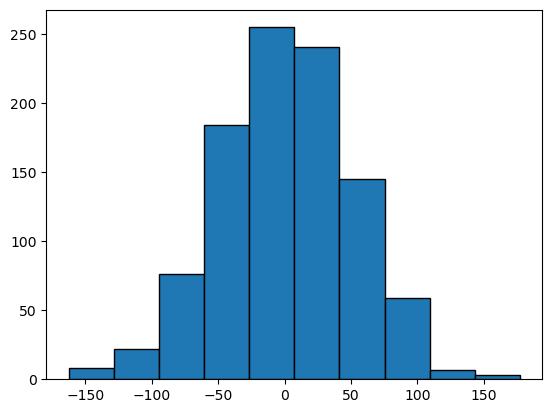

In [90]:
plt.hist(values)

In [91]:
print(np.count_nonzero(values>observed))
print(np.count_nonzero(values>observed)/n)

218
0.218
